In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [23]:
class Dynamics(object):
    def __init__(self):
        self.dim = 3 #dimension
        self.num_particles = 50
        self.boxlength = 10
        self.mass = 1
        self.k = 1
        self.temp = 100
        self.eps = 1
        self.sigma = 1
        self.steps = 2000
        self.dt = 0.001
        self.positions = np.zeros((self.num_particles,self.dim))
        self.velocities = np.zeros((self.num_particles,self.dim))
        
    def initial_position(self):
        self.positions = np.random.random_sample((self.num_particles, self.dim))*self.boxlength
        
    def initial_velcoities(self):
        std_deviation = ((self.k * self.temp)/self.mass)**0.5
        self.velocities = np.random.normal(loc=0,scale=std_deviation, size =(self.num_particles, self.dim) )
        
    def lj_pair_potential(self,p1,p2):
        #force on p1 due to p2
        r = self.positions[p1] - self.positions[p2]
        r_mag = np.linalg.norm(r)
        r_cap = r/r_mag
        
        f_mag = 24*self.eps/r_mag * (2*((self.sigma/r_mag)**12) - (self.sigma/r_mag)**6)
        return f_mag * r_cap
    
    
    def lj_force(self,p):
        force = np.zeros(shape = 2)
        for part in range(self.num_particles):
            if part == p:
                continue
            force = force + self.lj_pair_potential(p,part)
        return force
    
    def euler_integration(self):
        for i in range(self.steps):
            forces = np.array([self.lj_force(p) for p in range(self.num_particles)])
            self.positions += self.velocities*self.dt
            self.velocities += forces*(self.dt/self.mass)
    
        
    
        
        
    def draw_circle(self):
        plt.figure(figsize =(5,5))
        axis = plt.gca()
        
        axis.set_xlim(-10,self.boxlength+10) #these two lines are boundary area! 
        axis.set_ylim(-10,self.boxlength+10)
        
        for i in range(self.num_particles):
            axis.add_patch(plt.Circle(self.positions[i],radius = 0.5, linewidth =2, edgecolor = 'black'))
         

d = Dynamics()
#d1 = d.initial_position()
#d2 = d.initial_velcoities()
#print(d.positions)
#print(d.velocities)
#d.euler_integration()

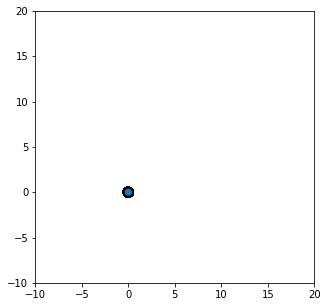

In [4]:
#d.draw_circle()